# Power Calculations in Python
This notebook contains examples of power calculations conducted using python.  I created this notebook because I find performing power calculations in Stata a little too hands off (in the sense that I often forget what formula is being used) and performing power calcs in Excel a little too hands on.  This notebook draws from slides presented by Jacob Klerman at Abt Associates.

__Contents:__

- [Variance of Sum of Variables](#sum)


<a id='sum'></a>

## Calculating The Variance of a Sum of Variables
By the definition of variance, the variance of the sum of two random variables X and Y multiplied by fixed constants a and b is:

$$ Var(aX+bY) = a^2Var(X)+b^2Var(Y) $$

It follows that the variance of the mean of $N$ i.i.d. random variables $y_i$ is:

$$ Var(\bar{y})=Var\left(\frac{\sum{y_i}}{N}\right)=Var\left(\sum{\frac{y_i}{N}}\right)=\frac{1}{N^2}Var\left(\sum{y_i}\right) = \frac{1}{N^2}N\sigma^2_y = 
\frac{\sigma^2_y}{N} $$

Where $\sigma^2_y = Var(y_i)$

## The Basic Formula - Unit Level Randomization, Simple Diffs in Means, Assuming Normality

We start with the simplest situation we could imagine: an RCT in which we randomize at the unit level, estimate the impact using a difference in means (no covariates), and assume normality of the outcome measures.  In this scenario, out estimate of impact is:

$$ \Delta = \bar{y_t}-\bar{y_c} $$

If we use a two-side test with size $\alpha$ we reject the null of no effect if 

$$ \left|\frac{\Delta}{\sigma_\Delta}\right| \geq t_{1-\alpha/2}$$

Where $\sigma^2_\Delta$ equals:

$$ \sigma^2_\Delta = \frac{\sigma^2_t}{N_t}+\frac{\sigma^2_c}{N_c} $$

Where ${N_t}$ and ${N_c}$ are the treatment and control sample sizes respectively.  

In this case our minimum detectable impact (MDI) for $1-\beta$ power is...

$$ MDI = (t_{1-\alpha/2}+t_{\beta})\sigma_\Delta$$

The graph below provides visual clarification for the source of the $t_{1-\alpha/2}+t_{\beta}$ term. Note that even in this very simplistic scenario, the assumption of normality is not entirely justified.  See Imbens and Rubin for more info.)

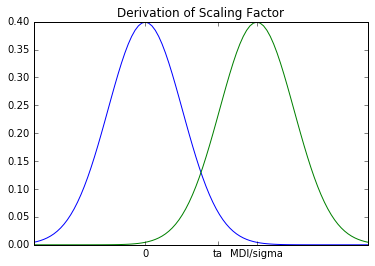

In [2]:
%matplotlib inline
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.linspace(-3,6,100)
plt.plot(x,norm.pdf(x))

plt.plot(x,norm.pdf(x-3))
ax.set_xticks((0,1.96,3))
ax.set_xticklabels(('0','ta', 'MDI/sigma'))
plt.title(r'Derivation of Scaling Factor')

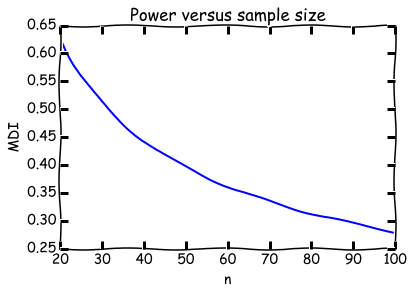

In [3]:
# plot MDI versus sample size 
# where n is sample size for t and c separately (assuming equal size)
# and a binomial variable with prevalence roughly .5
alpha = .05
beta = .8
p = .5
M = norm.ppf(1-alpha/2)+norm.ppf(beta)
def mdi(n):
    sigma_d_sq = p*(1-p)/(n/2)+p*(1-p)/(n/2) # see equation for sigma_delta_squared above
    return sigma_d_sq**.5*M

x = np.linspace(20,100)
plt.xkcd()
plt.plot(x,mdi(x))
plt.title("Power versus sample size")
plt.xlabel("n")
plt.ylabel("MDI")

## Covariates
Ajusting the formula to deal with covariates is straightforward.  We simply replace $\sigma^2_\Delta$ with $\sigma^2_\epsilon$, the variance "net" of the regressors:

$$ \sigma^2_\epsilon = (1-R^2)\sigma^2_\Delta $$


## Subgroup Analysis
If we want to estimate the *difference* in impact for two subgroups, the formula is 

$$ \Delta = (\bar{y_{t1}}-\bar{y_{c1}})-(\bar{y_{t2}}-\bar{y_{c2}}) $$

Assuming sample size is split equally between the two subgroups...

$$ \sigma^2_{subg} = \frac{\sigma^2_t}{N_t/2}+\frac{\sigma^2_t}{N_t/2}+\frac{\sigma^2_c}{N_c/2}+\frac{\sigma^2_c}{N_c/2}=4\sigma^2_\Delta$$

Thus, we will be able to detect a difference in impact between the two subgroups of roughly twice the size as our overall MDI.  In most cases we expect the subgroup difference to be substantially smaller than the overall effect though.  

Note that this is without accounting for multiple comparisons.  

## Accounting for Weighting
TBD

## Accounting for Clustering
TBD

## Accounting for Multiple Baseline or End Line Measures
TBD

## Estimating Power through Simulation
In many cases, there is no obvious closed form solution to the problem of estimating power.  In these cases, our only option is to estimate power through simulations. It is here that tools like python really shine.  


